In [101]:
# Main
import pandas as pd

In [102]:
dataset = pd.read_excel('data/REER_database_ver14Jun2021.xls', sheet_name='REER_MONTHLY_143', 
                        index_col=0)
countryMapping = pd.read_excel('data/REER_database_ver14Jun2021.xls', sheet_name='READ ME', 
                              header=47, index_col=1, usecols=['Country', 'code'])

# Renaming Columnd
dataset.columns = dataset.columns.str.split('_').str[-1]
mapping = countryMapping.to_dict()['Country']
dataset.rename(columns=mapping, inplace=True)

# Parsing Dates
dataset.index.name = 'Date'
dataset.index = pd.to_datetime(dataset.index, format='%YM%m')
dataset.index.freq = 'MS'

In [103]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 341 entries, 1993-01-01 to 2021-05-01
Freq: MS
Columns: 177 entries, United Arab Emirates to Zambia
dtypes: float64(177)
memory usage: 474.2 KB


In [104]:
# Extracting country information
countries = ['Armenia', 'Belarus', 'Kazakhstan', 'Kyrgyz Republic',
             'Russian Federation']

startDate = '1995-01-01'
endDate = '2020-12-01'

data = dataset[countries].loc[startDate:endDate]
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 312 entries, 1995-01-01 to 2020-12-01
Freq: MS
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Armenia             312 non-null    float64
 1   Belarus             312 non-null    float64
 2   Kazakhstan          312 non-null    float64
 3   Kyrgyz Republic     312 non-null    float64
 4   Russian Federation  312 non-null    float64
dtypes: float64(5)
memory usage: 14.6 KB


<AxesSubplot:xlabel='Date'>

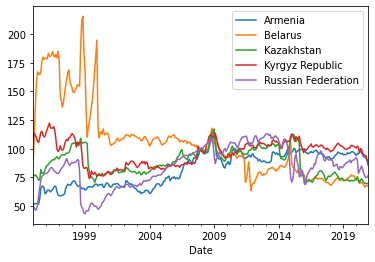

In [105]:
data.plot()

In [106]:
# Renormalize REERs at 1995m1 = 100 and 2000m1 = 100
data1995 = 100*data/data.loc['1995-01-01', :]
data2000 = 100*data/data.loc['2000-01-01', :]

In [107]:
data1995.head()

,Armenia,Belarus,Kazakhstan,Kyrgyz Republic,Russian Federation
Date,,,,,
1995-01-01,100.000000,100.000000,100.000000,100.000000,100.000000
1995-02-01,99.742108,124.430556,100.853183,103.646357,97.213777
1995-03-01,99.645537,153.094416,101.276594,101.956687,92.973732
1995-04-01,100.444375,173.731435,99.536785,100.020867,94.584033
1995-05-01,99.568752,182.907362,97.802901,96.895549,102.804359


<AxesSubplot:xlabel='Date'>

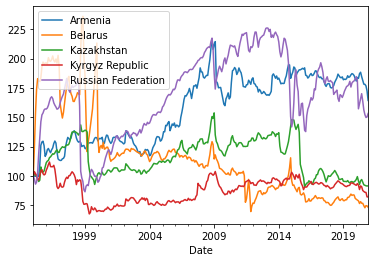

In [109]:
data1995.plot()

<AxesSubplot:xlabel='Date'>

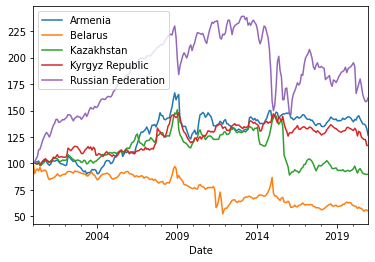

In [113]:
data2000['2000-01-01':].plot()

In [114]:
# Saving to csv
data1995.to_csv('data/dataset1995.csv')
data2000['2000-01-01':].to_csv('data/dataset2000.csv')

In [115]:
# Saving to pickle
data1995.to_pickle('data/dataset1995.pkl')
data2000['2000-01-01':].to_pickle('data/dataset2000.pkl')